In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
def load_data(name, path):
    dataset = []
    data_path = path + name
    c = 0
    for file_name in os.listdir(data_path):
        c += 1
        img = cv2.imread(os.path.join(data_path, file_name))
        img = np.array(img)
        dataset.append(img)
        if c == 100:
            break

    return np.array(dataset)

hr = load_data('hr', 'datasets/simplelines/')


In [3]:
y_train = hr.astype('float32') / 255.0

In [4]:
x_train = tf.image.resize(y_train, (y_train.shape[1] // 2 // 2, y_train.shape[2] // 2 // 2))

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2DTranspose(3, (3, 3), (2, 2), padding="same", use_bias=False, input_shape=(250, 250, 3)),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(3, (3, 3), padding="same", use_bias=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(3, (3, 3), padding="same", use_bias=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(3, (3, 3), padding="same", use_bias=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Activation(activation='relu')
])

In [6]:
save_callback = tf.keras.callbacks.ModelCheckpoint(
    'models/CNN/checkpoint'    
)

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 500, 500, 3)      81        
 nspose)                                                         
                                                                 
 up_sampling2d (UpSampling2D  (None, 1000, 1000, 3)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1000, 1000, 3)     0         
                                                                 
 conv2d (Conv2D)             (None, 1000, 1000, 3)     81        
                                                                 
 dropout_1 (Dropout)         (None, 1000, 1000, 3)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1000, 1000, 3)     8

In [ ]:
model.fit(x_train, 
          y_train, 
          batch_size=64, 
          epochs=15)

# Force refit

In [ ]:
model = tf.keras.models.load_model('models/CNN/my_model.h5')
model.load_weights('models/CNN/my_model_weights.h5')
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.1)

In [9]:
model.save('models/CNN/my_model.h5')
model.load_weights('models/CNN/my_model_weights.h5')

In [10]:
pred = np.array(model(x_train[1:1+1:]))

In [1]:
plt.imsave('images/pred.png', pred[0])
plt.imsave('images/lr.png', np.array(x_train[0]))
plt.imsave('images/hr.png', np.array(y_train[0]))

NameError: name 'plt' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


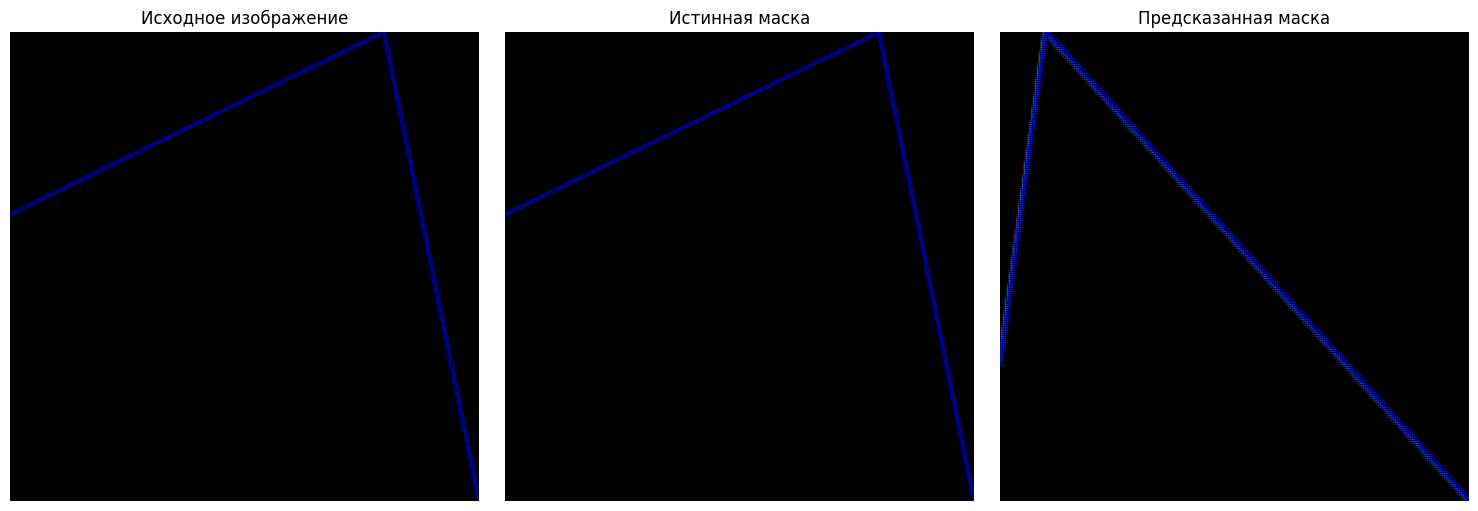

In [26]:
x_train_img = x_train[0]
y_train_mask = y_train[0]
predicted_mask = pred[0] * 9

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(x_train_img, cmap='gray')
axs[0].set_title('Исходное изображение')
axs[0].axis('off')

axs[1].imshow(y_train_mask, cmap='gray')
axs[1].set_title('Истинная маска')
axs[1].axis('off')

axs[2].imshow(predicted_mask, cmap='gray')
axs[2].set_title('Предсказанная маска')
axs[2].axis('off')

plt.tight_layout()
plt.show()